In [1]:
import polars as pl
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Первичная обработка данных

In [2]:
df = pl.read_excel("./data/24MAG_HW_1_v14.xls", has_header=False)
df = df.rename(
    dict(
        zip(
            [f"column_{i}" for i in range(1, 7)],
            [
                "age",
                "num_dependants",
                "income",
                "years_in_region",
                "car_value",
                "credit_value",
            ],
        )
    )
)
df

age,num_dependants,income,years_in_region,car_value,credit_value
i64,i64,i64,i64,i64,i64
37,2,29900,7,30000,297000
29,0,1500,5,0,4000
33,2,25200,6,null,248000
28,1,24900,3,24000,241000
47,2,8800,15,9000,92000
…,…,…,…,…,…
19,2,8000,12,50000,200000
40,2,14500,10,14000,144000
null,2,12600,15,13000,130000


In [3]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,50.0,50.0,50.0
"""null_count""",3.0,3.0,3.0,2.0,2.0,2.0
"""mean""",38.632653,1.979592,19808.163265,10.12,20920.0,200586.0
"""std""",8.661923,0.989314,10269.490346,4.930703,11527.854465,99386.004866
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0
"""25%""",33.0,1.0,12100.0,6.0,13000.0,128000.0
"""50%""",39.0,2.0,16800.0,11.0,19000.0,200000.0
"""75%""",46.0,3.0,29200.0,14.0,30000.0,293000.0
"""max""",56.0,4.0,43300.0,19.0,50000.0,437000.0


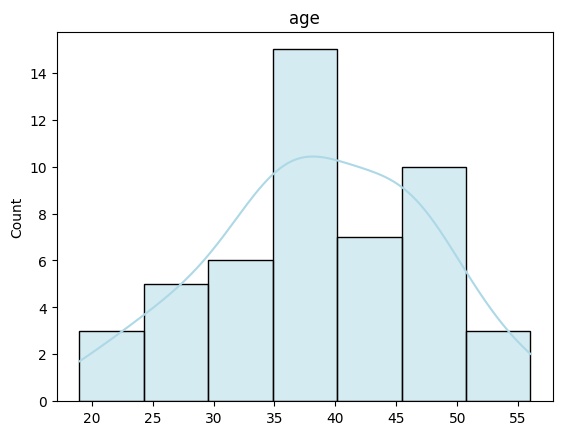

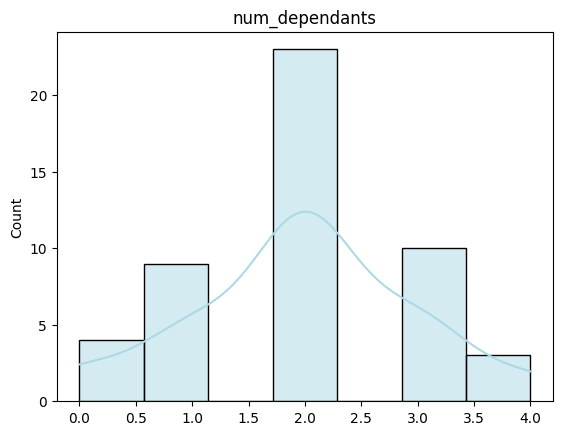

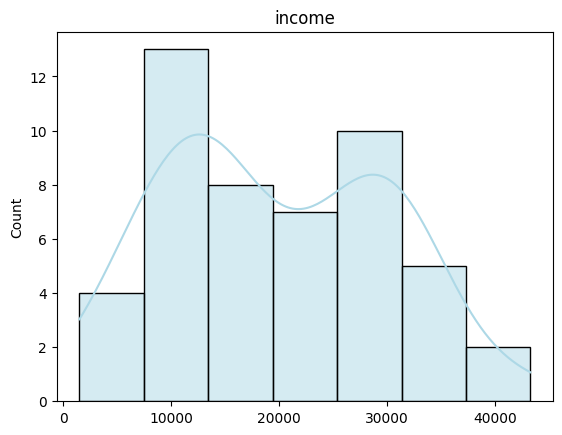

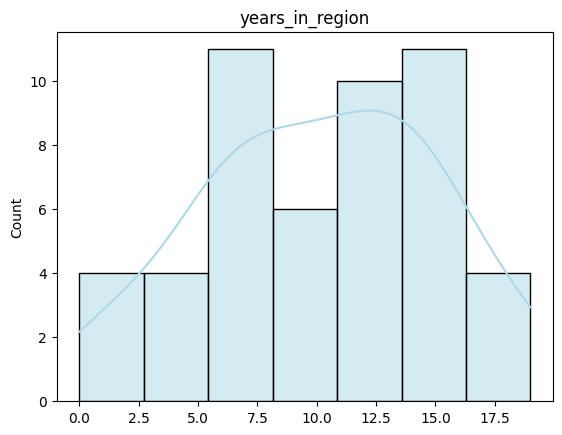

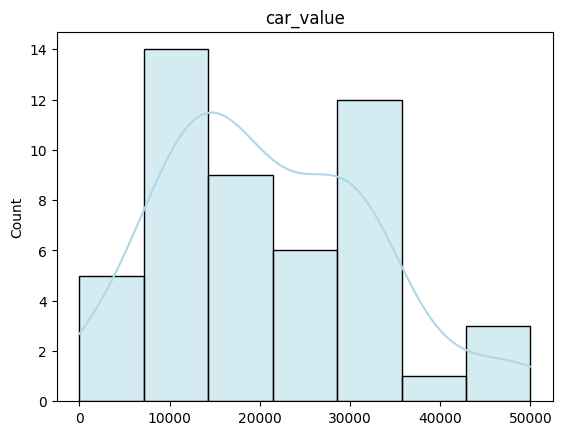

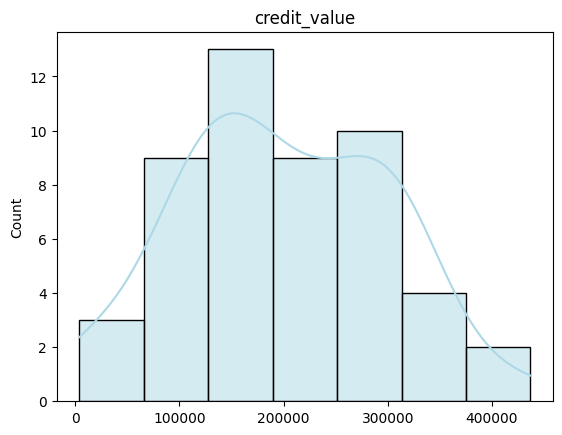

In [4]:
for col_name in df.columns:
    sns.histplot(df[col_name], bins=7, kde=True, color="lightblue", edgecolor="black")
    plt.title(col_name)
    plt.show()

In [282]:
df = df.fill_null(strategy="mean")

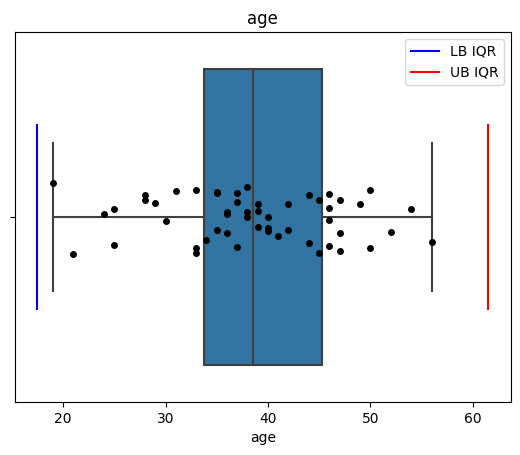

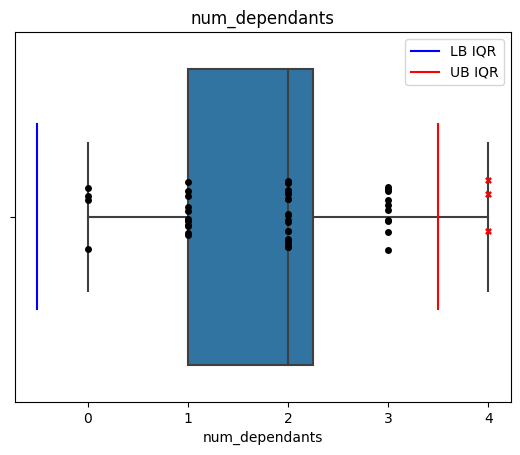

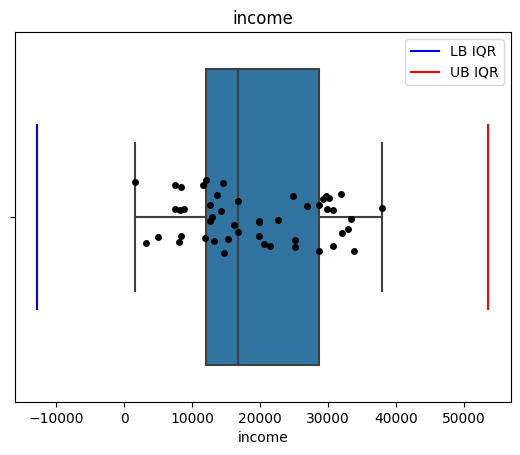

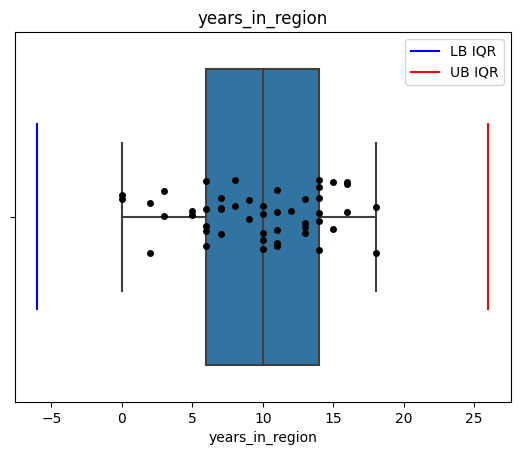

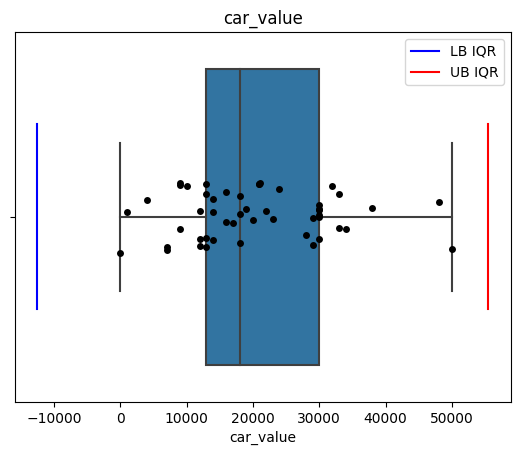

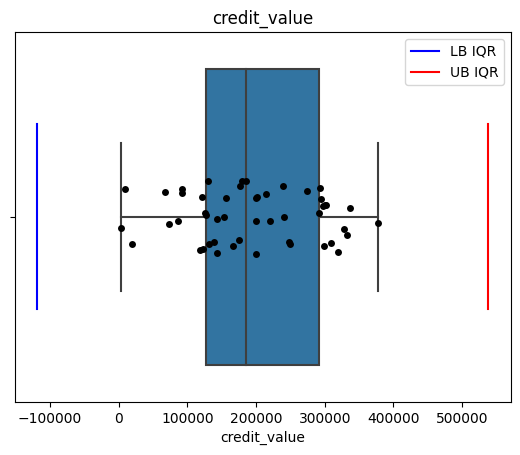

In [283]:
df_orig_size = len(df)

for col_name in df.columns:
    
    plt.title(col_name)
    sns.boxplot(x=df[col_name])

    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    plt.axvline(lower_bound, ymin=0.25, ymax=0.75, color="b", label="LB IQR")
    plt.axvline(upper_bound, ymin=0.25, ymax=0.75, color="r", label="UB IQR")

    sns.stripplot(
        x=df.filter(
            (pl.col(col_name) >= lower_bound) & (pl.col(col_name) <= upper_bound)
        )[col_name],
        color="black",
    )
    sns.stripplot(
        x=df.filter((pl.col(col_name) < lower_bound))[col_name],
        color="blue",
        marker="X",
    )
    sns.stripplot(
        x=df.filter((pl.col(col_name) > upper_bound))[col_name], color="red", marker="X"
    )

    plt.legend()
    plt.show()

    df = df.filter(
        (pl.col(col_name) >= lower_bound) & (pl.col(col_name) <= upper_bound)
    )

In [284]:
df_originale = df.clone()

In [285]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",38.183673,1.795918,19208.653061,9.77551,20282.44898,194172.897959
"""std""",8.265575,0.865534,9639.637488,4.624506,11094.089742,93701.807169
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0
"""25%""",33.0,1.0,12100.0,6.0,13000.0,128000.0
"""50%""",38.0,2.0,16800.0,10.0,18000.0,186000.0
"""75%""",45.0,2.0,28700.0,14.0,30000.0,292000.0
"""max""",54.0,3.0,38000.0,18.0,50000.0,377000.0


# 2. Снижение размерности. Метод PCA 

Центрирование и нормировка

In [286]:
for col_name in df.columns:
    df = df.with_columns((pl.col(col_name) - df[col_name].mean()).alias(col_name))
    df = df.with_columns(
        (pl.col(col_name) / np.linalg.norm(df[col_name].to_numpy())).alias(col_name)
    )

In [287]:
df.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value
str,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-8.2700e-17,-1.1329e-17,2.2658e-18,0.0,-4.5315e-18,4.5315e-18
"""std""",0.144338,0.144338,0.144338,0.144338,0.144338,0.144338
"""min""",-0.334995,-0.29949,-0.265158,-0.305108,-0.263881,-0.292941
"""25%""",-0.09052,-0.132728,-0.10644,-0.117839,-0.094747,-0.101932
"""50%""",-0.003207,0.034033,-0.036066,0.007007,-0.029695,-0.012589
"""75%""",0.11903,0.034033,0.142117,0.131852,0.126428,0.150692
"""max""",0.276193,0.200794,0.281369,0.256698,0.386635,0.281626


Найдем SVD разложение

In [288]:
Z = df.to_numpy()

In [289]:
U, S, VT = np.linalg.svd(df.to_numpy())

Найдем ошибки аппроксимации в спектральной норме и в норме Фробениуса и построим их графики зависимости от количества сингулярных чисел

In [290]:
frobenius_errors = []
spectral_errors = []
explained_vars = []

for i in range(len(S)):
    S_n = S.copy()
    S_n = S_n[: i + 1]

    S_n_padded = np.concatenate(
        [np.diag(S_n), np.zeros([U.shape[0] - (i + 1), i + 1])], axis=0
    )

    Z_approx = U @ S_n_padded @ VT[: i + 1, ...]

    frobenius_errors.append(np.linalg.norm(Z - Z_approx, ord="fro"))
    spectral_errors.append(np.linalg.norm(Z - Z_approx, ord=2))
    explained_vars.append(sum(S_n**2) / sum(S**2))

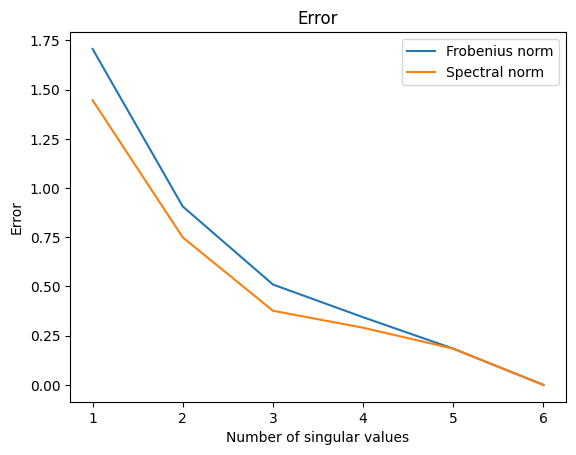

In [291]:
plt.plot(range(1, len(frobenius_errors) + 1), frobenius_errors, label="Frobenius norm")
plt.plot(range(1, len(spectral_errors) + 1), spectral_errors, label="Spectral norm")
plt.title("Error")
plt.xlabel("Number of singular values")
plt.ylabel("Error")
plt.legend()

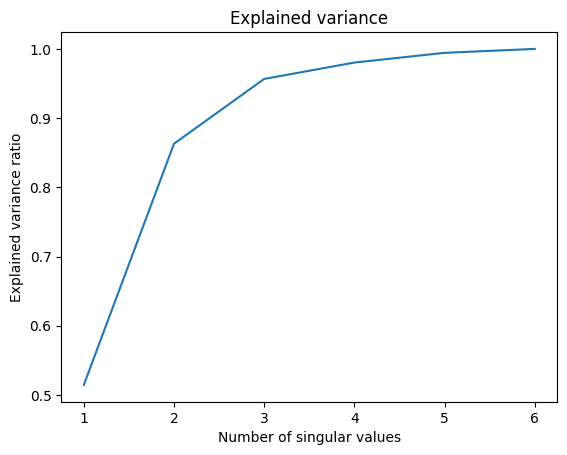

In [292]:
plt.plot(range(1, len(explained_vars) + 1), explained_vars)
plt.title('Explained variance')
plt.xlabel('Number of singular values')
plt.ylabel('Explained variance ratio')
plt.show()

По графику ***Объясненной Дисперсии*** можно сделать вывод, что хватит 2 факторов, так как они объясняют более 85% дисперсии.

In [293]:
SUFF_K = 2

In [294]:
S_n = S.copy()
S_n = S_n[:SUFF_K]

S_n = np.concatenate([np.diag(S_n), np.zeros([U.shape[0] - SUFF_K, SUFF_K])], axis=0)

Z_k = U @ S_n

In [295]:
Z_k.shape

(49, 2)

In [296]:
df_with_factors = pl.DataFrame(
    {f"factor_{i+1}": Z_k[:, i] for i in range(Z_k.shape[1])}
)

In [297]:
df_with_factors

factor_1,factor_2
f64,f64
-0.252495,0.101062
0.23784,-0.551534
-0.167741,-0.016768
-0.266429,-0.191635
0.347484,0.026727
…,…
-0.191044,-0.019831
0.126289,-0.025847
0.210484,0.005151


In [298]:
df_with_factors.describe()

statistic,factor_1,factor_2
str,f64,f64
"""count""",49.0,49.0
"""null_count""",0.0,0.0
"""mean""",2.8322e-17,9.0630e-18
"""std""",0.253583,0.208748
"""min""",-0.470123,-0.603001
"""25%""",-0.235553,-0.105002
"""50%""",0.104046,0.016406
"""75%""",0.210484,0.119644
"""max""",0.432532,0.327887


/tmp/ipykernel_2132/2792927818.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_with_factors, x="factor_1", y="factor_2", palette="deep")


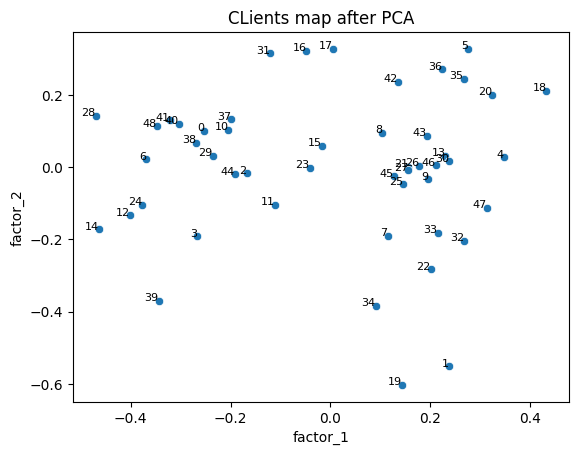

In [343]:
plt.title('CLients map after PCA')
sns.scatterplot(data=df_with_factors, x="factor_1", y="factor_2", palette="deep")
for i in range(len(df_with_factors)):
    plt.text(df_with_factors['factor_1'][i], df_with_factors['factor_2'][i], str(i), fontsize=8, ha='right')
plt.show()

In [ ]:
df_with_factors_ = df_with_factors.with_columns(pl.Series(range(len(df_with_factors))).alias('id'))
df_with_factors_

In [ ]:
df_originale = df_originale.with_columns(pl.Series(range(len(df_originale))).alias('id'))
df_originale

In [334]:
ids1 = df_with_factors_.filter(pl.col('factor_1') <= pl.mean('factor_1'))['id']
ids2 = df_with_factors_.filter(pl.col('factor_1') > pl.mean('factor_1'))['id']

Описательные статистики оригинальных признаков для клиентов, у которых значение первого скрытого фактора меньше среднего

In [335]:
df_originale[ids1].describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value,id
str,f64,f64,f64,f64,f64,f64,f64
"""count""",22.0,22.0,22.0,22.0,22.0,22.0,22.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",33.181818,1.772727,27013.636364,6.681818,29810.909091,280454.545455,23.227273
"""std""",7.122308,0.751622,7471.42464,3.590813,7946.56614,47583.237618,15.067884
"""min""",19.0,0.0,8000.0,0.0,20000.0,200000.0,0.0
"""25%""",28.0,1.0,24900.0,5.0,23000.0,241000.0,11.0
"""50%""",35.0,2.0,29700.0,7.0,30000.0,294000.0,24.0
"""75%""",37.0,2.0,31900.0,10.0,33000.0,309000.0,38.0
"""max""",47.0,3.0,38000.0,13.0,50000.0,377000.0,48.0


Описательные статистики оригинальных признаков для клиентов, у которых значение первого скрытого фактора больше среднего

In [336]:
df_originale[ids2].describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value,id
str,f64,f64,f64,f64,f64,f64,f64
"""count""",27.0,27.0,27.0,27.0,27.0,27.0,27.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",42.259259,1.814815,12849.037037,12.296296,12518.518519,123869.333333,24.62963
"""std""",6.836512,0.96225,5737.264381,3.790827,6066.112495,54301.31738,13.879005
"""min""",25.0,0.0,1500.0,2.0,0.0,4000.0,1.0
"""25%""",39.0,1.0,8800.0,11.0,9000.0,92000.0,17.0
"""50%""",44.0,2.0,12900.0,13.0,13000.0,130000.0,25.0
"""75%""",47.0,3.0,16200.0,15.0,16000.0,167000.0,35.0
"""max""",54.0,3.0,28700.0,18.0,30000.0,200586.0,47.0


Из таблиц видно, что для клиентов из первой группы такие признаки как **Доход** (income), **Оценка автомобиля** (car value) и **Размер кредита** (credit value) в среднем больше, чем для клиентов из второй группы, тогда как для остальных признаков не получается провести четкого разграничения. Из этого можно предположить, что **первый скрытый фактор** обозначает достаток клиента. 

In [340]:
ids3 = df_with_factors_.filter(pl.col('factor_2') <= pl.mean('factor_2'))['id']
ids4 = df_with_factors_.filter(pl.col('factor_2') > pl.mean('factor_2'))['id']

Описательные статистики оригинальных признаков для клиентов, у которых значение второго скрытого фактора меньше среднего

In [341]:
df_originale[ids3].describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value,id
str,f64,f64,f64,f64,f64,f64,f64
"""count""",21.0,21.0,21.0,21.0,21.0,21.0,21.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",33.52381,1.095238,16248.0,7.428571,16900.952381,162423.142857,22.52381
"""std""",7.28436,0.70034,9534.488135,4.388296,11931.387977,95792.85186,14.517641
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0,1.0
"""25%""",28.0,1.0,8000.0,3.0,9000.0,86000.0,11.0
"""50%""",33.0,1.0,14500.0,8.0,14000.0,167000.0,23.0
"""75%""",39.0,2.0,24900.0,11.0,23000.0,240000.0,33.0
"""max""",46.0,2.0,31900.0,14.0,50000.0,309000.0,47.0


Описательные статистики оригинальных признаков для клиентов, у которых значение второго скрытого фактора больше среднего

In [342]:
df_originale[ids4].describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value,id
str,f64,f64,f64,f64,f64,f64,f64
"""count""",28.0,28.0,28.0,28.0,28.0,28.0,28.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",41.678571,2.321429,21429.142857,11.535714,22818.571429,217985.214286,25.107143
"""std""",7.252349,0.547964,9269.674067,4.032113,9889.022614,86253.339447,14.27855
"""min""",21.0,1.0,8200.0,5.0,9000.0,92000.0,0.0
"""25%""",36.0,2.0,13600.0,7.0,14000.0,143000.0,15.0
"""50%""",44.0,2.0,19808.0,13.0,20920.0,200586.0,28.0
"""75%""",47.0,3.0,29700.0,14.0,30000.0,294000.0,37.0
"""max""",54.0,3.0,38000.0,18.0,48000.0,377000.0,48.0


Из таблиц видно, что для клиентов из первой группы такие признаки как **Возраст** (age) и **Количество иждивенцев** (num_dependants) в среднем меньше, чем для клиентов из второй группы, тогда как для остальных признаков не получается провести четкого разграничения. Из этого можно предположить, что **второй скрытый фактор** описывает семейное положение клиента (совокупность возраста и количества иждивенцев). 

Судя по описательным статистикам нельзя утверждать, что один из этих факторов имеет как-либо связан с признаком **Срок проживания в регионе** (years_in_region), возможно информация как раз об этом признаке и была утрачена в ходе PCA.

Исходя из выводов выше и карты клиентов можно предположить что на карте близкие друг к другу клиенты имеют схожий уровень достатка и схожее семейное положение.

# 3. Вложение MDS.

Матрица расстояний

In [302]:
from scipy.spatial import distance_matrix

In [303]:
D_matrix = np.vstack(distance_matrix(*[df.to_numpy()] * 2))

In [304]:
D_matrix.shape

(49, 49)

In [305]:
S_matrix = (
    -0.5
    * (np.eye(D_matrix.shape[0]) - np.ones(D_matrix.shape) / D_matrix.shape[0])
    @ D_matrix
    @ (np.eye(D_matrix.shape[0]) - np.ones(D_matrix.shape) / D_matrix.shape[0])
)

Проверка симметричности

In [306]:
EPS = 1e-15

In [307]:
np.all(np.abs(S_matrix - S_matrix.T) < EPS)

True

Проверка неотрицательной определенности

In [308]:
np.all(np.linalg.eigvals(S_matrix) > 0)

True

--> Матрица расстояний соответствует необходимым условиям для точного вложения.

In [309]:
K_DIMS = 2

In [310]:
k_eig_vals, k_eig_veks = np.linalg.eig(S_matrix)

In [311]:
S_matrix_approx = (k_eig_veks * k_eig_vals**0.5)[:, :K_DIMS] @ (
    k_eig_veks * k_eig_vals**0.5
)[:, :K_DIMS].T

In [312]:
S_matrix_approx.shape

(49, 49)

In [313]:
print(np.linalg.norm(S_matrix - S_matrix_approx, ord="fro"))
print(np.linalg.norm(S_matrix - S_matrix_approx, ord=2))

1.3182813233592763
0.7626802319986786


In [314]:
np.all(np.abs(S_matrix_approx - S_matrix_approx.T) < EPS)

True

In [315]:
np.all(np.linalg.eigvals(S_matrix_approx) > 0)

False

--> Матрица не может быть точно вложена в 2-ух мерное пространство.

In [316]:
from sklearn.manifold import MDS

In [317]:
embedder = MDS(2, dissimilarity="precomputed")

In [318]:
k_dim_embeddings = embedder.fit_transform(D_matrix)

/home/alex/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [319]:
k_dim_embeddings.shape

(49, 2)

In [320]:
D_matrix_k_dim_embs = np.vstack(distance_matrix(*[k_dim_embeddings] * 2))

In [321]:
D_matrix_k_dim_embs.shape

(49, 49)

In [322]:
print(
    np.sqrt(sum(sum((D_matrix - D_matrix_k_dim_embs) ** 2)) / sum(sum((D_matrix) ** 2)))
)

0.10254747411786994


In [323]:
df_with_embs = pl.DataFrame(
    {f"dim_{i+1}": k_dim_embeddings[:, i] for i in range(k_dim_embeddings.shape[1])}
)

In [324]:
df_with_embs.describe()

statistic,dim_1,dim_2
str,f64,f64
"""count""",49.0,49.0
"""null_count""",0.0,0.0
"""mean""",1.1329e-17,4.5315e-18
"""std""",0.253588,0.243674
"""min""",-0.502206,-0.620907
"""25%""",-0.196162,-0.106164
"""50%""",0.015615,0.025573
"""75%""",0.172714,0.153936
"""max""",0.487019,0.565359


/tmp/ipykernel_2132/2737242698.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_with_embs, x="dim_1", y="dim_2", palette="deep")


<AxesSubplot: xlabel='dim_1', ylabel='dim_2'>

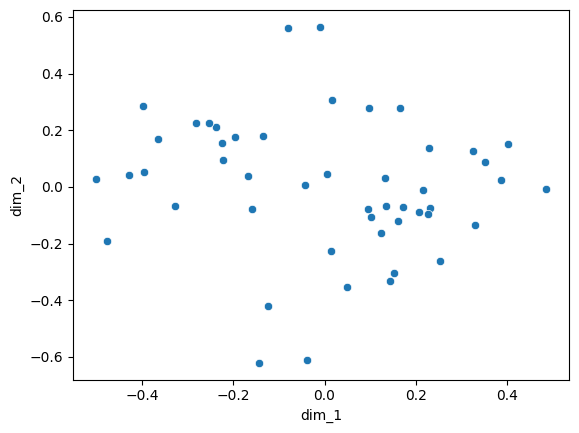

In [325]:
sns.scatterplot(data=df_with_embs, x="dim_1", y="dim_2", palette="deep")

Сравнение карт

In [326]:
df_with_embs_homogenic = df_with_embs.rename({"dim_1": "X", "dim_2": "Y"}).with_columns(
    pl.lit("MDS").alias("method")
)
df_with_factors_homogenic = df_with_factors.rename(
    {"factor_1": "X", "factor_2": "Y"}
).with_columns(pl.lit("SVD").alias("method"))

In [327]:
# df_compl = pl.concat([df_with_embs_homogenic, df_with_factors_homogenic])

In [ ]:
# sns.scatterplot(data=df_compl.to_pandas(), x="X", y="Y", hue="method", palette="deep")
# for i in range(len(df_with_factors)):
#     plt.text(df_with_factors['factor_1'][i], df_with_factors['factor_2'][i], str(i), fontsize=8, ha='right')

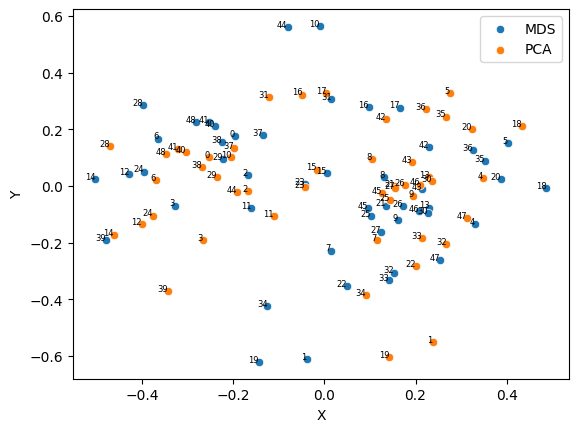

In [354]:
sns.scatterplot(data=df_with_embs_homogenic.to_pandas(), x="X", y="Y", label='MDS')
for i in range(len(df_with_embs_homogenic)):
    plt.text(df_with_embs_homogenic['X'][i], df_with_embs_homogenic['Y'][i], str(i), fontsize=6, ha='right')
    
sns.scatterplot(data=df_with_factors_homogenic.to_pandas(), x="X", y="Y", label='PCA')
for i in range(len(df_with_factors_homogenic)):
    plt.text(df_with_factors_homogenic['X'][i], df_with_factors_homogenic['Y'][i], str(i), fontsize=6, ha='right')

По графику выше видно, что карта клиентов, полученная с помощью вложения клиентов в пространство размерности 2 методом MDS почти повторяет карту, полученную с помощью PCA, в точности до поворота на небольшой угол. То есть если повернуть одну карту по кругу на некоторый угол, то получится почти в точности вторая карта, полученная другим методом.

Так же стоит отметить, что некоторые различия все же есть, например объект с индексом 10 имеет совершенно разные эмбеддинги в случае MDS и PCA. Если мы посмотрим на этот объект, то увидим что он имеет довольно необычные значения признаков: при возрасте 21 год у данного клиента имеется 3 иждивенца (что очень много), а при доходе 8200 (что ниже среднего более чем в 2 раза), оценка автомобиля составляет 48000 (что больше среднего более чем в 2 раза), а размер кредита составляет 250000 (что тоже сильно больше среднего). Возможно такими странными значениями признаков и обусловлено то, что результаты PCA и MDS на данном объекте так отличаются.

In [360]:
df_originale[10].to_pandas()

,age,num_dependants,income,years_in_region,car_value,credit_value,id
0,21,3,8200,11,48000,250000,10


In [361]:
df_originale.describe()

statistic,age,num_dependants,income,years_in_region,car_value,credit_value,id
str,f64,f64,f64,f64,f64,f64,f64
"""count""",49.0,49.0,49.0,49.0,49.0,49.0,49.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",38.183673,1.795918,19208.653061,9.77551,20282.44898,194172.897959,24.0
"""std""",8.265575,0.865534,9639.637488,4.624506,11094.089742,93701.807169,14.28869
"""min""",19.0,0.0,1500.0,0.0,0.0,4000.0,0.0
"""25%""",33.0,1.0,12100.0,6.0,13000.0,128000.0,12.0
"""50%""",38.0,2.0,16800.0,10.0,18000.0,186000.0,24.0
"""75%""",45.0,2.0,28700.0,14.0,30000.0,292000.0,36.0
"""max""",54.0,3.0,38000.0,18.0,50000.0,377000.0,48.0
